In [12]:
# pip install mljar-supervised
#or
# conda install -c conda-forge mljar-supervised
# pip install requests

import requests
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML



In [2]:
#get data
url = 'https://pennstateoffice365-my.sharepoint.com/:x:/g/personal/rjn5308_psu_edu/EZ-qWOeA5jxNkKXpwdWk_CoB-rCxrvsYcdhHaqzLfWruAQ?e=6inkuL&download=1'
r = requests.get(url)
r.status_code
with open('data.csv', 'w') as fid:
    fid.write(r.text)

#read data into pandas and view
data = pd.read_csv('data_og.csv')

In [13]:
# on plane
#read data into pandas and view
data = pd.read_csv('data_og.csv')

In [14]:
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) # issue with json
data.fillna(method="ffill", inplace=True)
#data.dropna(inplace=True) # NEW

In [15]:
y = data['status']
#X = data.drop('status', axis=1, inplace=False)

X = data
dropList = ['wind_damage_rating', 'surge_damage_rating', 'rainwater_ingress_damage_rating', 'Unnamed0', 'longitude', 'status']
for each in dropList:
    X = X.drop(each, axis=1)

In [16]:
X.columns

Index(['Buildinglat', 'hazards_present', 'building_type', 'number_of_stories',
       'understory_pct_of_building_footprint', 'year_built', 'roof_shape',
       'mwfrs', 'foundation_type', 'wall_structure', 'wall_substrate',
       'wall_cladding', 'roof_system', 'roof_substrate_type', 'roof_cover',
       'Buildinglong', 'mindist'],
      dtype='object')

In [17]:
# X.describe()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

<AxesSubplot:>

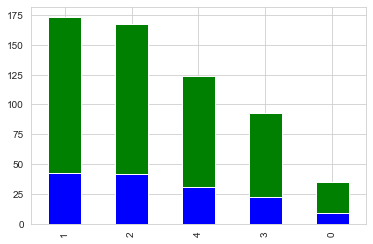

In [18]:
y_train.value_counts().plot(kind='bar',color='green')
y_test.value_counts().plot(kind='bar', color='blue')

In [ ]:
automl = AutoML(
    results_path='2022_7_22_full-class',
    ml_task='multiclass_classification',
    #ml_task = 'regression',
   #algorithms=["CatBoost", "Xgboost", "LightGBM", "Random Forest", "Linear", "Decision Tree"],
    explain_level= 2,
    hill_climbing_steps=2,
    top_models_to_improve=2,
    golden_features=True, #on / off when needed
    features_selection=True,
    stack_models=True,
    train_ensemble=True,
    mix_encoding=True,
    validation_strategy={
        "validation_type": "kfold",
        "k_folds": 5,
        "shuffle": True,
        "stratify": True,
    }
)

automl.fit(X_train, y_train)


AutoML directory: 2022_7_22_full-class
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'mix_encoding', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble', 'stack', 'ensemble_stacked']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.501979 trained in 14.26 seconds


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated an

2_DecisionTree logloss 1.586101 trained in 41.23 seconds
3_Linear logloss 1.390655 trained in 28.92 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 1.184888 trained in 154.07 seconds
5_Default_NeuralNetwork logloss 2.052843 trained in 21.43 seconds
6_Default_RandomForest logloss 1.199217 trained in 77.35 seconds
* Step mix_encoding will try to check up to 1 model
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Cont

In [8]:
predictions = automl.predict(X_test)


In [9]:

predict_all = automl.predict_all(X_test)

In [10]:

score = automl.score(X_test, y_test)
score


0.48755980394611287

In [11]:
predict_all

,prediction
0,2.142661
1,2.540641
2,1.945785
3,1.618312
4,1.401410
...,...
143,1.589508
144,0.925429
145,2.968555
146,1.506323
